## Quantum circuits

Take it from [here](https://learning.quantum.ibm.com/course/basics-of-quantum-information/quantum-circuits).

To simulate the circuits, we need [qiskit-aer](https://qiskit.github.io/qiskit-aer/), which is a simulator for noisy models and ideal models.

In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.quantum_info import Operator
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

By default, the qubits are name as $q_0, q_1, \cdots$

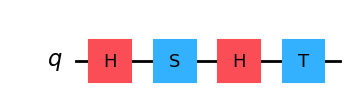

In [2]:
# create a circuit
qc = QuantumCircuit(1)

# implement gates
qc.h(0)
qc.s(0)
qc.h(0)
qc.t(0)

# print the circuit
qc.draw(output='mpl')

But we can use *QUantumRegister* to customize

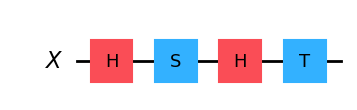

In [5]:
# create a circuit
X = QuantumRegister(1, 'X')
qc = QuantumCircuit(X)

# implement gates
qc.h(0)
qc.s(0)
qc.h(0)
qc.t(0)

# print the circuit
qc.draw(output='mpl')

Remember that the ordering of the qubits in Qiskit is peculiar. In the *QuantumCircuit* the ordering is $q_0, q_1, \cdots$ from the top to the bottom. But in the code the ordering is from right to left. That is $\text{QuantumCircuit: } q_0, q_1,\cdots, q_n \rightarrow \text{Code: } q_n, q_{n-1},\cdots, q_0$

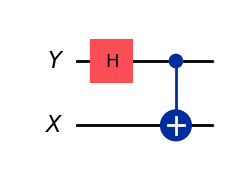

<IPython.core.display.Latex object>

In [19]:
# we can customize the circuit with more qubits
qrx = QuantumRegister(1, 'X')
qry = QuantumRegister(1, 'Y')
qc  = QuantumCircuit(qry, qrx)

# apply gates
qc.h(qry)
qc.cx(control_qubit=qry, target_qubit=qrx)

# draw
display(qc.draw(output='mpl'))

# obtain the operator from the circuit
display(Operator.from_circuit(qc).draw('latex'))

In an *n*-qubit circuit, we can see the operations in the same way if we had an *n*-qubit system. In the above circuit, the Hadamard gate corresponds to the oeprator $H\otimes I$, for example. And the entire circuit corresponds to the operator $(CNOT)(HI)\ket{xy}$.

To measure a circuit, we need to include classical bits.

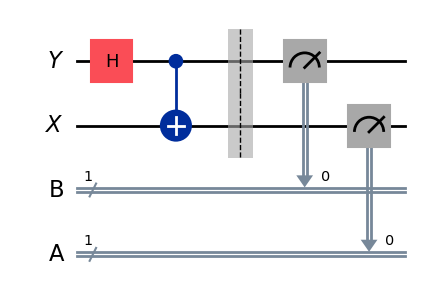

In [29]:
# we can customize the circuit with more qubits
qrx = QuantumRegister(1, 'X')
qry = QuantumRegister(1, 'Y')
qra = ClassicalRegister(1, 'A')
qrb = ClassicalRegister(1, 'B')
qc  = QuantumCircuit(qry, qrx, qrb, qra)

# apply gates
qc.h(qry)
qc.cx(control_qubit=qry, target_qubit=qrx)

# measure
qc.barrier()
qc.measure(qry, qrb)
qc.measure(qrx, qra)

# draw
display(qc.draw(output='mpl'))

The circuit can be simulated using the *AerSimulator*

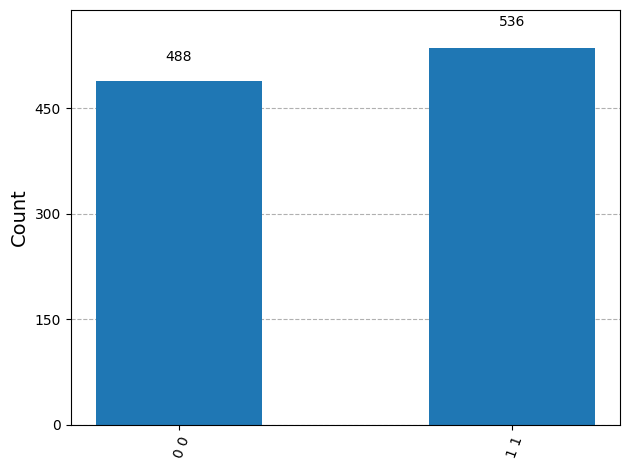

In [27]:
# simulate circuit
result = AerSimulator().run(qc).result()

# plot
stats = result.get_counts()
display(plot_histogram(stats))